In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm

In [2]:
class Particle:
    
    def __init__(self, r0, v0, a0, t, m=1, radius=2., Id=0):
        
        self.dt = t[1] - t[0]
        
        
        # Atributos instantaneos
        self.r = r0
        self.v = v0
        self.a = a0
        
        self.m = m
        self.radius = radius
        self.Id = Id
        
        
        self.p = self.m*self.v
        
        self.f = self.m*self.a
        
        # Historial
        
        self.R = np.zeros((len(t),len(r0)))
        self.V = np.zeros_like(self.R)
        self.A = np.zeros_like(self.R)
        
        self.F = np.zeros_like(self.R)
        
        self.P = np.zeros_like(self.R)
    
        # Fisica
        self.K = 20.
        
        self.VEk = np.zeros(len(t))
        self.Ep = 0
        self.VEp = np.zeros(len(t))
        
    def Evolution(self,i):
        
        
        self.SetPosition(i)
        self.SetVelocity(i)
        
        self.a = self.f/self.m
        self.SetPotentialEnergy(i)
        
        # Euler-Cromer
        self.v += self.dt*self.a
        self.r += self.dt*self.v
        
        
    def CalculateForce(self):
        
        self.f = self.m*np.array([0,-9.8])
        self.Ep += self.m*9.8*self.r[1]
        
    # Aca debes agregar la energía potencial
    
    def ResetForce(self):
        self.f[:] = 0.
        self.a[:] = 0.
        self.Ep = 0.
    
    # Setter
    def SetPosition(self,i):
        self.R[i] = self.r
    
    def SetVelocity(self,i):
        self.V[i] = self.v
        self.P[i] = self.m*self.v
        self.VEk[i] = 0.5*self.m*np.dot(self.v,self.v)
        
    def SetPotentialEnergy(self,i):
        self.VEp[i] = self.Ep
        
    # Getter
    def GetPosition(self,scale=1):
        return self.R[::scale]
    
    def GetVelocity(self,scale=1):
        return self.V[::scale]
 
    def GetMomentum(self,scale=1):
        return self.P[::scale]
    
    def GetKineticEnergy(self,scale=1):
        return self.VEk[::scale] 
    
    def GetPotentialEnergy(self,scale=1):
        return self.VEp[::scale] 
    
    # Debes agregar las paredes en este punto
    def CheckLimits(self):
        
        for i in range(2):
            
            if self.r[i] + self.radius > 20 and self.v[i] > 0.:
                self.v[i] = -0.9*self.v[i]
            elif self.r[i] - self.radius < -20 and self.v[i] < 0.:
                self.v[i] = -0.9*self.v[i]
    

In [3]:
def GetParticles(t):
    
    r0 = np.array([-15.,-10.])
    v0 = np.array([2.,0])
    a0 = np.array([0.,0.])
    
    p0 = Particle(r0,v0,a0,t,m=1,radius=2,Id=0)
    
    Particles = [p0]
    
    # Aca deber agregar una rutina montecarlo para crear particulas
    # sobre el plano con velocidades aleatorias.
    
    return Particles

In [4]:
dt = 0.001
tmax = 30
t = np.arange(0,tmax,dt)
Particles = GetParticles(t)

In [5]:
def RunSimulation(t,Particles):
    
    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps' ):
        
        for i in range(len(Particles)):
                    Particles[i].CalculateForce()
        
        for i in range(len(Particles)):
            Particles[i].Evolution(it)
            Particles[i].ResetForce()
            Particles[i].CheckLimits()
            # Aca debes agregar la interaccion con la pared
            
            
    return Particles

In [6]:
Particles = RunSimulation(t,Particles)

Running simulation: 100%|█████████████████████████████████████████████████| 30000/30000 [00:00<00:00, 51384.03 Steps/s]


In [7]:
# Bajamos dimensión de la simulacion
scale = 100
t1 = t[::scale]

<IPython.core.display.Javascript object>


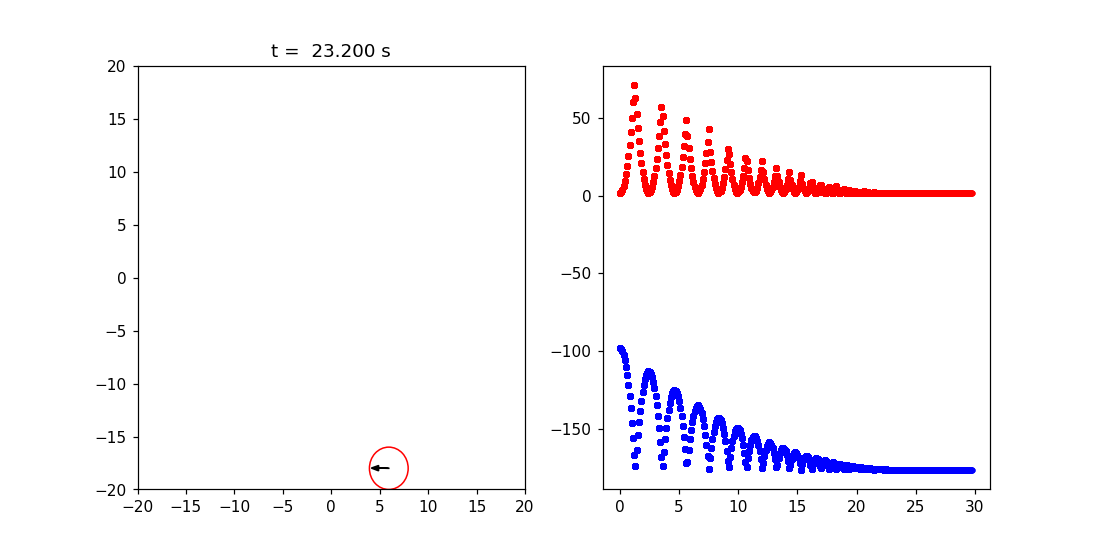

In [12]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

def init():
    
    ax.clear()
    ax.set_xlim(-20,20)
    ax.set_ylim(-20,20)
    
def Update(i):
    
    init()
    ax.set_title(r't =  %.3f s' %(t1[i]))
    
    
    # Queremos calcular la energía total de cinética
    KE = 0. # Kinetic energy
    U = 0. # Potential energy
    
    for p in Particles:
        
        x = p.GetPosition(scale)[i,0]
        y = p.GetPosition(scale)[i,1]
        
        vx = p.GetVelocity(scale)[i,0]
        vy = p.GetVelocity(scale)[i,1]
        
        circle = plt.Circle( (x,y), p.radius, color='r', fill=False )
        ax.add_patch(circle)
        
        ax.arrow(x,y,vx,vy,color='k',head_width=0.5,length_includes_head=True)
        
        KE += p.GetKineticEnergy(scale)[i]
        U +=p.GetPotentialEnergy(scale)[i]
        
        M = p.GetPotentialEnergy(scale)[:i] + p.GetKineticEnergy(scale)[:i]
        
        #ax1.set_title("K: {:.3f}, U: {:.3f}, M:{:.3f}".format(KE,Um,M))
        ax1.scatter(t1[:i], p.GetKineticEnergy(scale)[:i],color='red',marker='.')
        ax1.scatter(t1[:i], p.GetPotentialEnergy(scale)[:i],color='blue',marker='.')
        #ax1.scatter(t1[:i], M ,color='green',marker='.')
            
Animation = anim.FuncAnimation(fig,Update,frames=len(t1),init_func=init)

(b) ¿Qué tiempo tarda la pelota en dejar de rebotar? Haga la mejor estimación posible con los datos de su simulación

In [79]:
y_position = Particles[0].GetPosition(scale)[:,1]

t_n = []

for i in range(len(y_position)-1):
    dif = y_position[i+1]-y_position[i]
    
    if np.isclose(dif,0,atol=1e-3):
        t_n.append(i)
        
t_f = t[::scale][t_n[0]]
t_f

22.7

Significa que la pelota deja de rebotar en aproximadamente 22.7 segundos

(c) Suponga que no conociera la restitución. Use la altura de la pelota para calcular la restitución de la pelota con el suelo.

In [89]:
y_max = []
y_position = Particles[0].GetPosition(scale)[:,1]

for i in range(1,len(y_position)-1):
    
    if y_position[i-1] < y_position[i] > y_position[i+1]:
        y_max.append(y_position[i])

y_max

[-11.536244079999994,
 -12.772390991999991,
 -13.778591174399995,
 -14.592562577119988,
 -15.244656072991987,
 -15.783624308408784,
 -16.20588452122909,
 -16.55103251162715,
 -16.830285092796732,
 -17.065434467364835,
 -17.24315149329067,
 -17.391349267464612,
 -17.50805516234232,
 -17.60451481897691,
 -17.688670700634628,
 -17.746921418140968,
 -17.805831286948635,
 -17.844162380013902,
 -17.869430913003473,
 -17.895453528395954,
 -17.91887689922975,
 -17.937260604697414,
 -17.958040942895817,
 -17.969106745008904,
 -17.977208985252048,
 -17.99459473013894]

In [91]:
rest = []
for i in range(len(y_max)-1):
    rest.append(np.sqrt(y_max[i+1]/y_max[i]))
rest

[1.052213535871294,
 1.0386430149881625,
 1.0291137361562184,
 1.0220991644841464,
 1.017523743393963,
 1.0132882402170849,
 1.0105927445254745,
 1.0084008206713198,
 1.0069616675127628,
 1.0051934435022394,
 1.0042880998466368,
 1.0033496756479627,
 1.0027509383737592,
 1.0023873292841918,
 1.0016452010669508,
 1.0016583457328923,
 1.001075784823749,
 1.0007077831196156,
 1.000727867285178,
 1.0006542363146138,
 1.0005128388581548,
 1.0005790829388101,
 1.0003080541462637,
 1.0002254237576276,
 1.0004834327591505]

In [92]:
np.array(rest).mean()

1.009015368211129